# Task 1

In [69]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_iris = sns.load_dataset("iris")
df_titanic = sns.load_dataset("titanic")
df_tips = sns.load_dataset("tips")

print(df_iris.head())
print(df_iris.tail())
print(df_iris.shape)
print(df_iris.columns.tolist())
df_iris.info()

print(df_titanic.head())
print(df_titanic.tail())
print(df_titanic.shape)
print(df_titanic.columns.tolist())
df_titanic.info()

print(df_tips.head())
print(df_tips.tail())
print(df_tips.shape)
print(df_tips.columns.tolist())
df_tips.info()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    

# Task 2

In [26]:
data = {
    'Attributes' : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],
    'Roles' : ['Numerical','Numerical','Numerical','Numerical','Target']
}
dframe = pd.DataFrame(data)
print(dframe)

     Attributes      Roles
0  sepal_length  Numerical
1   sepal_width  Numerical
2  petal_length  Numerical
3   petal_width  Numerical
4       species     Target


# Task 3

In [33]:
print("Missing values before:\n", df_titanic.isnull().sum())

mean_age = df_titanic['age'].mean()
df_titanic['age'] = df_titanic['age'].fillna(mean_age)
mode_embarked = df_titanic['embarked'].mode()[0]
df_titanic['embarked'] = df_titanic['embarked'].fillna(mode_embarked)
df_titanic = df_titanic.drop(columns=['deck'])

print("\nMissing values after:\n", df_titanic.isnull().sum())

Missing values before:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


KeyError: "['deck'] not found in axis"

# Task 4

In [39]:
print('Before Iris: ')
print(df_iris.shape)
print(f"Number of duplicate records: {df_iris.duplicated().sum()}")

df_removeDuplicates1 = df_iris.drop_duplicates()
print('After Iris: ')
print(df_removeDuplicates1.shape)

print('Before Titanic: ')
print(df_titanic.shape)
print(f"Number of duplicate records: {df_titanic.duplicated().sum()}")

df_removeDuplicates2 = df_titanic.drop_duplicates()
print('After Titanic: ')
print(df_removeDuplicates2.shape)

print('Before Tips: ')
print(df_tips.shape)
print(f"Number of duplicate records: {df_tips.duplicated().sum()}")

df_removeDuplicates3 = df_tips.drop_duplicates()
print('After Tips: ')
print(df_removeDuplicates3.shape)


Before Iris: 
(150, 5)
Number of duplicate records: 1
After Iris: 
(149, 5)
Before Titanic: 
(891, 14)
Number of duplicate records: 111
After Titanic: 
(780, 14)
Before Tips: 
(244, 7)
Number of duplicate records: 1
After Tips: 
(243, 7)


# Task 5

In [49]:
mean_iris = df_iris.groupby('species').mean()
std_iris = df_iris.groupby('species').std()
print('Mean Iris: ')
print(mean_iris)
print('Std Iris: ')
print(std_iris)

mean_titanic= df_titanic.groupby('survived')[['age','fare']].mean()
print('Mean Titanic: ')
print(mean_titanic)

mean_tips = df_tips[['total_bill','tip']].mean()


Mean Iris: 
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
Std Iris: 
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650
Mean Titanic: 
                age       fare
survived                      
0         30.415100  22.117887
1         28.549778  48.395408


# Task 6

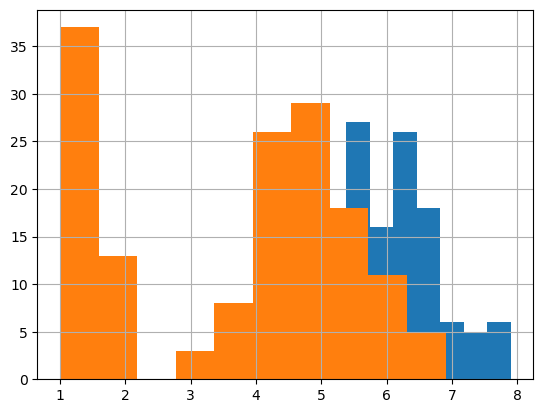

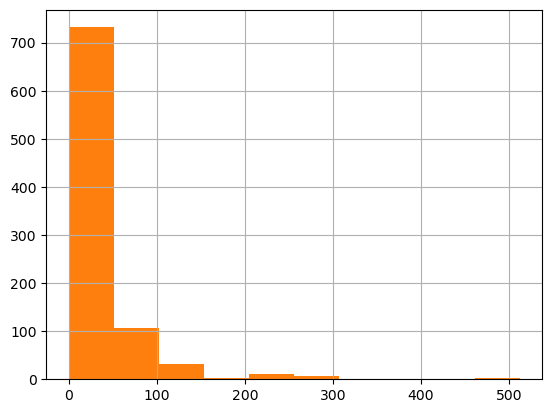

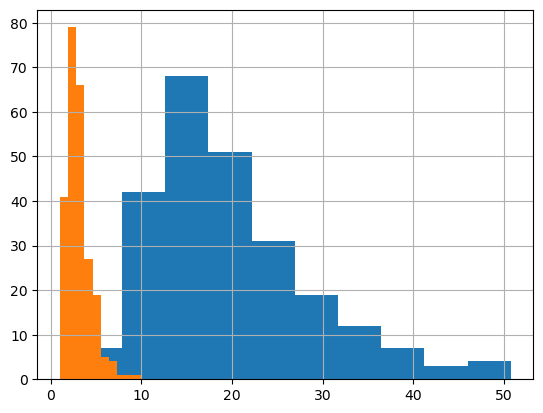

In [55]:
df_iris['sepal_length'].hist()
df_iris['petal_length'].hist()
plt.show()
df_titanic['age'].hist()
df_titanic['fare'].hist()
plt.show()
df_tips['total_bill'].hist()
df_tips['tip'].hist()
plt.show()


# Task 7

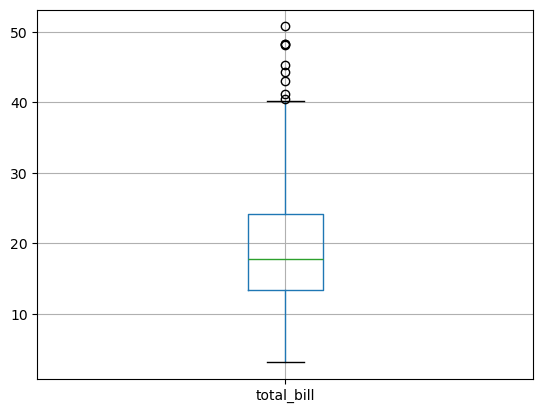

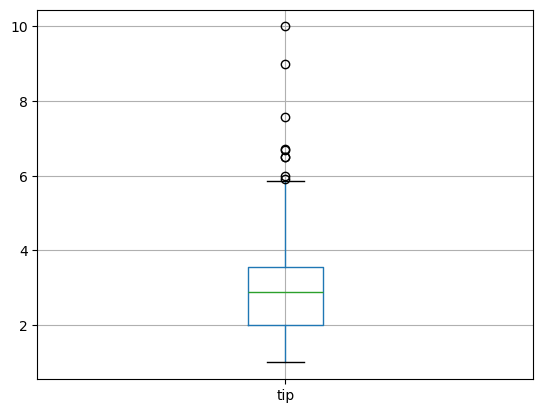

9
9


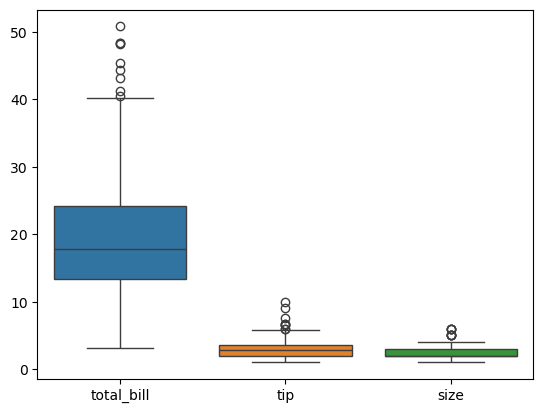

In [79]:
total_billQ1 = df_tips['total_bill'].quantile(0.25)
total_billQ3 = df_tips['total_bill'].quantile(0.75)
total_billIQR = total_billQ3 - total_billQ1
df_tips.boxplot(column=['total_bill'])
plt.show()
tipQ1 = df_tips['tip'].quantile(0.25)
tipQ3 = df_tips['tip'].quantile(0.75)
tipIQR = tipQ3 - tipQ1

totalbill_lower_bound = total_billQ1 - 1.5 * total_billIQR
totalbill_upper_bound = total_billQ3 + 1.5 * total_billIQR

tip_lower_bound = tipQ1 - 1.5 * tipIQR
tip_upper_bound = tipQ3 + 1.5 * tipIQR

df_tips.boxplot(column=['tip'])
plt.show()

outliers1 = df_tips[(df_tips['total_bill'] < totalbill_lower_bound) |
(df_tips['total_bill'] > totalbill_upper_bound)]
print(len(outliers))
sns.boxplot(df_tips)

outliers2 = df_tips[(df_tips['tip'] < tip_lower_bound) |
(df_tips['tip'] > tip_upper_bound)]
print(len(outliers2))


# Task 8

In [84]:
df_cleanedTotalBill = df_tips[(df_tips['total_bill'] >= totalbill_lower_bound) &
(df_tips['total_bill'] <= totalbill_upper_bound)]
print('Total Bill')
print(df_tips.shape)
print(df_cleanedTotalBill.shape)

df_cleanedTip = df_cleanedTotalBill[(df_cleanedTotalBill['tip'] >= tip_lower_bound) &
(df_cleanedTotalBill['tip'] <= tip_upper_bound)]
print('Tip')
print(df_tips.shape)
print(df_cleanedTip.shape)

Total Bill
(244, 7)
(235, 7)
Tip
(244, 7)
(235, 7)


# Task 9

In [88]:
print('Before: ')
print('Mean')
print(df_tips[['total_bill','tip']].mean())
print('Median')
print(df_tips[['total_bill','tip']].median())
print('Std deviation')
print(df_tips[['total_bill','tip']].std())

print('After TotalBill & tip outlier removed: ')
print('Mean')
print(df_cleanedTip[['total_bill','tip']].mean())
print('Median')
print(df_cleanedTip[['total_bill','tip']].median())
print('Std deviation')
print(df_cleanedTip[['total_bill','tip']].std())

  

Before: 
Mean
total_bill    19.785943
tip            2.998279
dtype: float64
Median
total_bill    17.795
tip            2.900
dtype: float64
Std deviation
total_bill    8.902412
tip           1.383638
dtype: float64
After TotalBill & tip outlier removed: 
Mean
total_bill    19.122851
tip            2.836809
dtype: float64
Median
total_bill    17.46
tip            2.74
dtype: float64
Std deviation
total_bill    8.176492
tip           1.100406
dtype: float64
